# Overhead and Data Load

In [1]:
import pandas as pd
import pytz
import datetime
import calendar
%matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
DATA_DIRECTORY = "/media/host_data/lions/"

In [10]:
df = pd.read_csv(DATA_DIRECTORY + 'map.csv', index_col='time', parse_dates=True)

In [12]:
df.index = df.index.tz_localize(pytz.timezone('UTC'))

In [17]:
df.index = df.index.tz_convert(pytz.timezone('America/Vancouver'))

In [18]:
first_date = df.index.min().date()
first_datetime = datetime.datetime(first_date.year,first_date.month,first_date.day,tzinfo=pytz.timezone('America/Vancouver'))
last_date = df.index.max().date()
timedelta = last_date - first_date
n_days = timedelta.days

# Basic Time-Series Plotting

We encode the middle lane's (lane 2) direction with an integer. Northbound or Up is a 1. Closed or x is a 0, and Southbound or Down is a -1.

In [19]:
df['lane2_int'] = df.apply(lambda x: 1 if x['lane2'] == 'up' else -1 if x['lane2'] == 'down' else 0, axis=1)

<IPython.core.display.Javascript object>


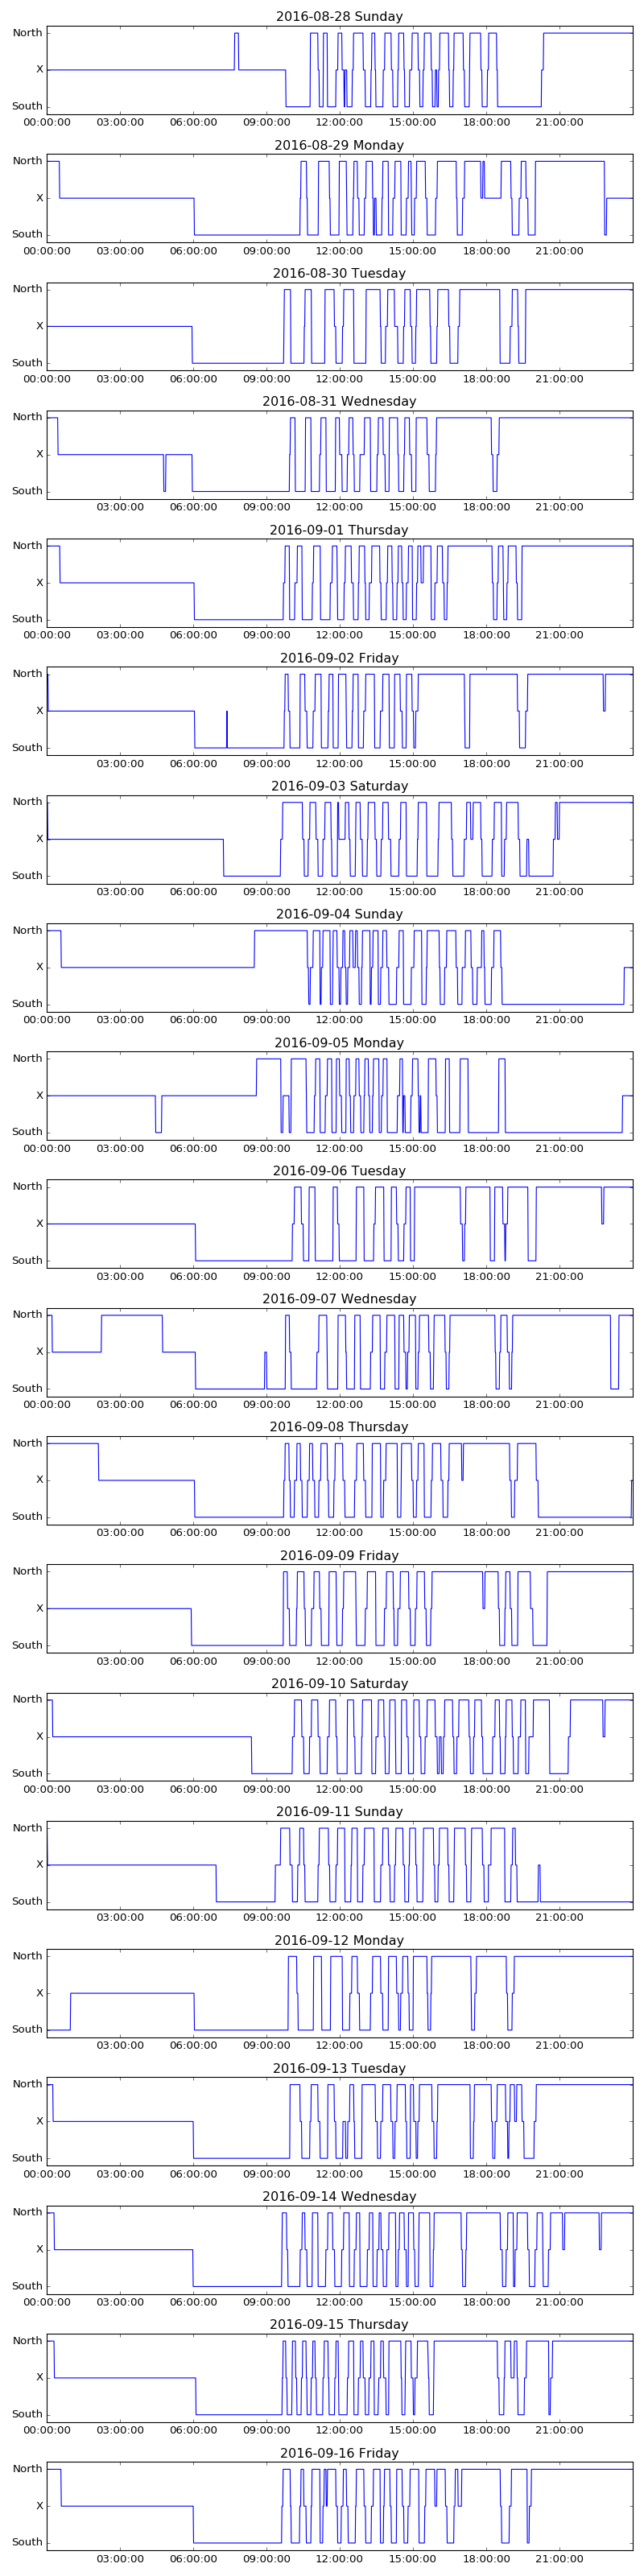

In [35]:
fig = plt.figure(figsize=(10,(n_days-1)*2))
#plt.title('Middle Lane State')
for i in range(1,n_days):
    fig.add_subplot(n_days-1,1,i+1-1)
    date = first_datetime + datetime.timedelta(days=i)
    
    # Indexing df below is inelegant, but other ways seem buggy
    plt.plot(df[str(date.year)+'-'+str(date.month)+'-'+str(date.day)]['lane2_int'])
    plt.gca().set_ylim([-1.2,1.2])
    ax = plt.gca()
    ax.xaxis_date(pytz.timezone('America/Vancouver'))
    ax.set_title(str(date.date()) + ' ' + calendar.day_name[date.weekday()])
    plt.yticks([-1,0,1],['South', 'X', 'North'])
plt.tight_layout()